In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
df = pd.read_csv('database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [4]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

# I will drop the columns that have more than 30% of missing values

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
df = df.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis=1)

In [8]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [9]:
df  = df.dropna(subset=['Magnitude Type'])

# removed the rows with missing values in the column Magnitude Type

df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [10]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


<Axes: >

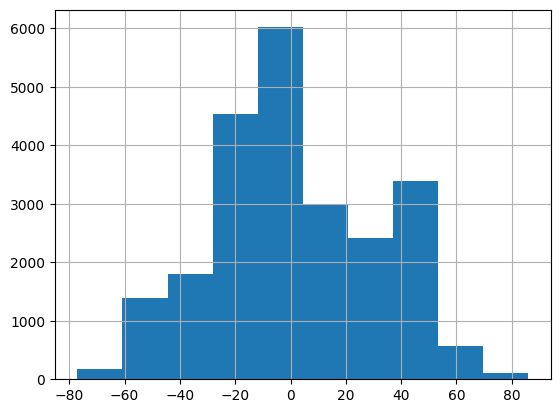

In [11]:
df['Latitude'].hist()

# Latitude is a normal distribution

In [12]:
values = df['Source'].unique()
values

value_counts = df['Source'].value_counts()
value_counts

df['Source'] = df['Source'].replace({'US': 1, 'ISCGEM': 0})

df['Source'] = pd.to_numeric(df['Source'], errors='coerce')

df = df.dropna(subset=['Source'])

In [13]:
values = df['Location Source'].unique()
values

value_counts = df['Location Source'].value_counts()
value_counts

df['Location Source'] = df['Location Source'].replace({'US': 1, 'ISCGEM': 0})

df['Location Source'] = pd.to_numeric(df['Location Source'], errors='coerce')

df = df.dropna(subset=['Location Source'])

In [14]:
values = df['Status'].unique()
values

value_counts = df['Status'].value_counts()
value_counts

df['Status'] = df['Status'].replace({'Automatic': 1, 'Reviewed': 0})

In [15]:
values_source = df['ID'].unique()
len(values_source)
df = df.drop(['ID'], axis=1)

# No need to keep the ID column

In [16]:
values = df['Magnitude Type'].unique()
df = df.drop(['Magnitude Type'], axis=1)
df = df.drop(['Magnitude Source'], axis=1)

In [17]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Source,Location Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,0.0,0.0,1
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,0.0,0.0,1
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,0.0,0.0,1
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,0.0,0.0,1
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,0.0,0.0,1


In [18]:
values = df['Type'].unique()
values

value_counts = df['Type'].value_counts()
value_counts

df['Type'] = df['Type'].replace({'Earthquake': 1, 'Nuclear Explosion': 0})

df['Type'] = pd.to_numeric(df['Type'], errors='coerce')

df = df.dropna(subset=['Type'])

In [19]:
df = df.drop(['Date', 'Time'], axis=1)

In [20]:
numeric_data = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
non_numeric_values = numeric_data.isna().any()
non_numeric_values

Latitude           False
Longitude          False
Type               False
Depth              False
Magnitude          False
Source             False
Location Source    False
Status             False
dtype: bool

In [21]:
df.corr().round(2)

,Latitude,Longitude,Type,Depth,Magnitude,Source,Location Source,Status
Latitude,1.00,0.24,-0.11,-0.08,0.04,-0.11,-0.11,0.11
Longitude,0.24,1.00,0.00,-0.09,0.04,-0.04,-0.04,0.04
Type,-0.11,0.00,1.00,0.05,0.00,-0.03,-0.03,0.03
Depth,-0.08,-0.09,0.05,1.00,0.02,0.01,0.01,-0.01
Magnitude,0.04,0.04,0.00,0.02,1.00,-0.10,-0.10,0.10
Source,-0.11,-0.04,-0.03,0.01,-0.10,1.00,1.00,-1.00
Location Source,-0.11,-0.04,-0.03,0.01,-0.10,1.00,1.00,-1.00
Status,0.11,0.04,0.03,-0.01,0.10,-1.00,-1.00,1.00


In [22]:
from sklearn.preprocessing import LabelEncoder

 # everything else except the target variable
X = df.drop('Latitude', axis=1)

# have only the target variable here (dependent variable)
y_temp = df['Latitude']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
2,Depth,4326969.26
0,Longitude,1199017.40
6,Status,18011.09
4,Source,2178.55
5,Location Source,2178.55
3,Magnitude,1112.09
1,Type,153.26


In [24]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [25]:
# save the categories into a list
categories = list(np.unique(df['Latitude']))
print(categories)

[-77.08, -72.448, -67.034, -66.448, -65.721, -65.651, -65.635, -65.5984, -65.592, -65.552, -65.543, -65.526, -65.478, -65.458, -65.436, -65.425, -65.417, -65.346, -65.198, -65.114, -64.969, -64.944, -64.872, -64.519, -63.884, -63.723, -63.68, -63.66, -63.653, -63.622, -63.612, -63.607, -63.592, -63.581, -63.563, -63.561, -63.497, -63.47, -63.4595, -63.398, -63.38, -63.378, -63.364, -63.342, -63.337, -63.31, -63.2943, -63.289, -63.263, -63.245, -63.211, -63.204, -63.197, -63.159, -63.123, -63.122, -63.091, -63.059, -63.0433, -63.023, -63.004, -62.973, -62.972, -62.964, -62.922, -62.902, -62.89, -62.884, -62.88, -62.877, -62.872, -62.8705, -62.855, -62.844, -62.834, -62.827, -62.806, -62.7789, -62.753, -62.722, -62.711, -62.707, -62.697, -62.693, -62.687, -62.631, -62.62, -62.599, -62.588, -62.5795, -62.571, -62.553, -62.551, -62.511, -62.496, -62.473, -62.47, -62.445, -62.43, -62.3661, -62.332, -62.316, -62.31, -62.3014, -62.2092, -62.141, -62.139, -62.1149, -62.114, -62.104, -62.099, -

In [26]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l=0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)


# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 7)                 28        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 20169)             181521    
                                                      

In [27]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500


499/499 [==============================] - 10s 15ms/step - loss: 10.9717 - accuracy: 0.0000e+00 - val_loss: 10.0668 - val_accuracy: 2.9240e-04
Epoch 2/500
499/499 [==============================] - 5s 10ms/step - loss: 9.8169 - accuracy: 0.0000e+00 - val_loss: 10.3246 - val_accuracy: 2.9240e-04
Epoch 3/500
499/499 [==============================] - 5s 10ms/step - loss: 9.7530 - accuracy: 2.5066e-04 - val_loss: 10.5684 - val_accuracy: 0.0000e+00
Epoch 4/500
499/499 [==============================] - 5s 10ms/step - loss: 9.7112 - accuracy: 1.8799e-04 - val_loss: 10.7971 - val_accuracy: 0.0000e+00
Epoch 5/500
499/499 [==============================] - 5s 10ms/step - loss: 9.6823 - accuracy: 1.2533e-04 - val_loss: 11.0132 - val_accuracy: 0.0000e+00
Epoch 6/500
499/499 [==============================] - 8s 15ms/step - loss: 9.6615 - accuracy: 2.5066e-04 - val_loss: 11.2193 - val_accuracy: 0.0000e+00
Epoch 7/500
499/499 [==============================] - 7s 14ms/step - loss: 9.

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

In [ ]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
 # the original heatmap without label names
# sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

# you can also use the actual names for the categories
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

In [ ]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

In [ ]:
df.columns

In [ ]:
tester_row = {
    'Longitude': 145,
    'Type': 1,
    'Depth': 130,
    'Magnitude': 6, 
    'Source': 0,
    'Location Source': 0, 
    'Status': 1
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [ ]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated Latitude:")
print(f"{round(float(result), 2)}")
print("----------------")